In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Messing around with csv data
data = pd.read_csv("data.csv")
print(data)


    fname   lname
0   Jason      Yu
1  Bianca   Chang


In [8]:
data_set = datasets.load_diabetes()
feature_names = ', '.join(data_set['feature_names'])
print(f"Features: {feature_names}")


Features: age, sex, bmi, bp, s1, s2, s3, s4, s5, s6


In [19]:
# Getting feature data and actual data
diabetes_X = data_set['data']
diabetes_y = data_set['target']

# Use only one feature (BMI)
print(diabetes_X[:, 2][:10])
print(diabetes_X[:, np.newaxis, 2][:10])

# Getting data ready
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215]
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]]



In [20]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [28]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


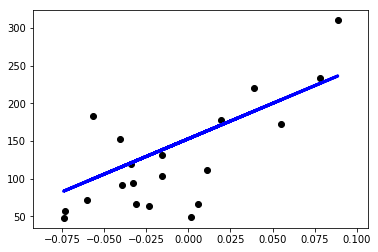

In [26]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

# Displaying Graph
plt.show()